## Enable widget extention
if widgets are not enabled: run this cell and refresh site

In [1]:
!python3 `which jupyter` nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Import libraries

In [1]:
import sys
import os
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent / 'utilities')

if utilities_dir not in sys.path:
    sys.path.append(utilities_dir)

In [2]:
#ipywidgets imports
import cals.filterToolbox as ftb
import dashboard as dash
#self made functions
import editDF as edf
from IPython.display import display
from ipywidgets import interact, fixed


## Import and edit datatabase from CSV

In [3]:
resistanceFileName = ['dataset/resistanceM', 'dataset/resistanceV6 - Copy']
timeParameterFileName = ['dataset/timeParameter1']
locationParameterFileName = ['dataset/locationParameter']

resistance = edf.EditDF.readMultipleCSV(resistanceFileName)
timeParameter = edf.EditDF.readMultipleCSV(timeParameterFileName)
locationParameter = edf.EditDF.readMultipleCSV(locationParameterFileName)
#snr = timeParameter.iloc[4:8].apply(pd.to_numeric)


In [4]:
#Parse index for sector
resistance = edf.EditDF.parseIndex(resistance)
locationParameter = edf.EditDF.parseIndex(locationParameter)


## Enable timestamp ploting
This is necessary because of an error in the matplotlib.pyplot library, without that it is not possible to plot timestamps

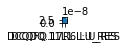

In [5]:
dash.Dashboard.enableTimestampPlotting(resistance)


## Prefilter Dateframe by rejecting invalid ramps
Find dates with current SNR bigger than the margin. These dates are then deleted from the dataframe because the ramp cannot be used for the calculation of the busbar resistance

In [6]:
#set margin for current SNR
lowMargin = 500
highMargin = 50000
#find dates with current SNR bigger than the margin and saves them into array
cutLow = edf.EditDF.smallValueDates(timeParameter.iloc[6], lowMargin)
cutHigh = edf.EditDF.smallValueDates(timeParameter.iloc[7], highMargin)
#drop invalid ramps
resistance = edf.EditDF.drop(resistance, cutLow)
resistance = edf.EditDF.drop(resistance, cutHigh)

print(str(len(cutLow)) + ' ramps filtered because of invalid low ramp \n' + str(
	len(cutHigh)) + ' ramps filtered because of invalid high ramp')


106 ramps filtered because of invalid low ramp 
130 ramps filtered because of invalid high ramp


## DataFrame Filter → Compare signals from same time/location 
Filters Dataframe with parametes set with widgets and shows the filtered Dataframe.
The warning: invalid value encountered in greater... is caused by nan values in calculated parameter and can be neglected

In [7]:
#Reset dashboard history
dash.log = []
dash.warnings = []


In [8]:
#get values from widgets
filt, startTime, endTime, sector, feature, featureMargin = ftb.FilterToolbox.importFilterWidgets(resistance)
display(startTime, endTime, sector, feature, featureMargin)


In [13]:
#Filters Dataframe with parametes set above with the widgets and shows the filtered Dataframe
bigSignals, filterText = ftb.FilterToolbox.filterAll(resistance, locationParameter, startTime.value, endTime.value,
                                                     sector.value, feature.value, featureMargin.value)
bigSignals


2010-03-12 20:40:56.40  2010-03-14 12:14:14.14  \
DCQDE.11R1.R:U_RES             8.909569e-09            1.322528e-08   
DCQFQ.11L1.R:U_RES             1.122455e-08            1.179643e-08   
DCQFQ.17L1.R:U_RES             6.066908e-09            3.117539e-09   
DCQDQ.20R1.R:U_RES             9.458347e-09            2.363449e-09   
DCQFB.C23R1.R:U_RES            8.346983e-09            2.723096e-09   
DCQFQ.12L2.L:U_RES             8.189528e-09            9.893512e-09   
DCQFB.C12R2.L:U_RES            5.842182e-09            6.265129e-09   
DCQDD.7R2.L:U_RES              6.319247e-09            5.736268e-09   

                     2010-03-21 05:53:55.53  2010-03-23 13:33:53.33  \
DCQDE.11R1.R:U_RES             9.471082e-09            9.477303e-09   
DCQFQ.11L1.R:U_RES             1.143417e-08            1.117092e-08   
DCQFQ.17L1.R:U_RES             3.230475e-09            3.878915e-09   
DCQDQ.20R1.R:U_RES             5.695143e-10            5.281264e-09   
DCQFB.C23R1.R:U_RES            2.681263e-09            2.916422e-09   
DCQFQ.12L2.L:U_RES             6.328290e-09            5.107367e-09   
DCQFB.C12R2.L:U_RES            6.634128e-09            6.396076e-09   
DCQDD.7R2.L:U_RES              5.642860e-09            5.552339e-09   

                     2010-03-25 07:21:32.21  2010-03-26 06:38:22.38  \
DCQDE.11R1.R:U_RES             9.141654e-09            9.810125e-09   
DCQFQ.11L1.R:U_RES             9.994064e-09            1.174089e-08   
DCQFQ.17L1.R:U_RES             3.068711e-09            1.948905e-09   
DCQDQ.20R1.R:U_RES             1.349618e-09            2.900108e-09   
DCQFB.C23R1.R:U_RES            3.518592e-09            3.145613e-09   
DCQFQ.12L2.L:U_RES             5.573002e-09            5.863843e-09   
DCQFB.C12R2.L:U_RES            6.217725e-09            6.289816e-09   
DCQDD.7R2.L:U_RES              5.596849e-09            5.941099e-09   

                     2010-03-26 16:50:25.50  2010-03-29 05:05:46.05  \
DCQDE.11R1.R:U_RES             9.613538e-09            9.496363e-09   
DCQFQ.11L1.R:U_RES             1.096446e-08            1.136313e-08   
DCQFQ.17L1.R:U_RES             3.219355e-09            3.376745e-09   
DCQDQ.20R1.R:U_RES             1.529015e-09            1.690241e-09   
DCQFB.C23R1.R:U_RES            3.425182e-09            2.940672e-09   
DCQFQ.12L2.L:U_RES             4.891780e-09            6.507843e-09   
DCQFB.C12R2.L:U_RES            6.716291e-09            6.076721e-09   
DCQDD.7R2.L:U_RES              5.355890e-09            5.676624e-09   

                     2010-03-29 21:51:08.51  2010-03-30 11:47:50.47  \
DCQDE.11R1.R:U_RES             9.969487e-09            9.558472e-09   
DCQFQ.11L1.R:U_RES             1.130436e-08            1.148930e-08   
DCQFQ.17L1.R:U_RES             3.517684e-09            3.061825e-09   
DCQDQ.20R1.R:U_RES             5.075889e-09            5.160310e-09   
DCQFB.C23R1.R:U_RES            2.958791e-09            3.055589e-09   
DCQFQ.12L2.L:U_RES             5.423102e-09            6.325862e-09   
DCQFB.C12R2.L:U_RES            6.564281e-09            6.313557e-09   
DCQDD.7R2.L:U_RES              5.380931e-09            5.905933e-09   

                              ...            2018-05-30 10:28:55.28  \
DCQDE.11R1.R:U_RES            ...                      1.853682e-09   
DCQFQ.11L1.R:U_RES            ...                      1.554172e-09   
DCQFQ.17L1.R:U_RES            ...                      2.749768e-09   
DCQDQ.20R1.R:U_RES            ...                      2.485949e-09   
DCQFB.C23R1.R:U_RES           ...                      2.364145e-09   
DCQFQ.12L2.L:U_RES            ...                      6.184293e-09   
DCQFB.C12R2.L:U_RES           ...                      6.110330e-09   
DCQDD.7R2.L:U_RES             ...                      6.109652e-09   

                     2018-05-31 03:58:35.58  2018-05-31 18:25:58.25  \
DCQDE.11R1.R:U_RES             1.633277e-09            1.780826e-09   
DCQFQ.11L1.R:U_RES             1.417166

## Statistic-Dashboard →Find trends, correlations and possible errors 
See documentation for precise description.
Time is at BMode_6.0

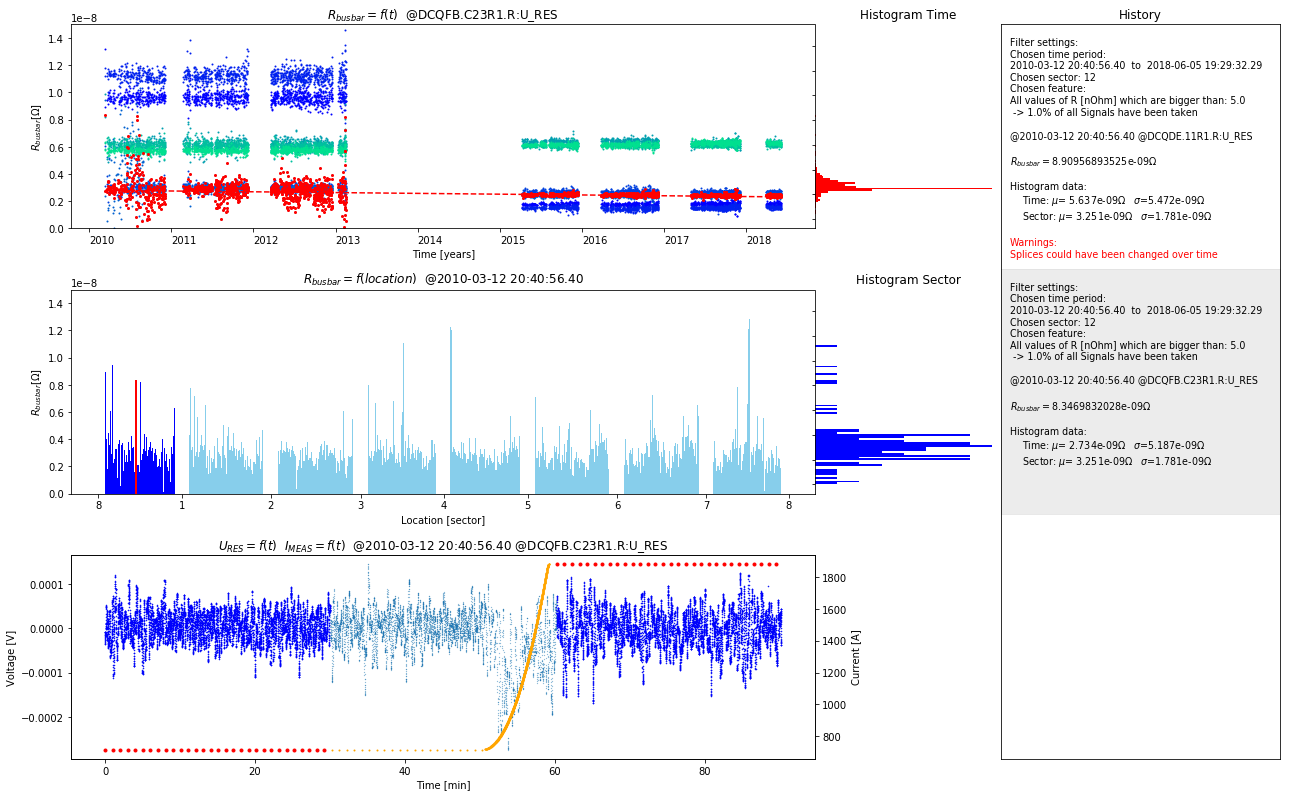

In [14]:
interact(dash.Dashboard.showDash,
         Time=list(bigSignals.columns.values),
         Location=list(bigSignals.index.values),
         # fixed variables
         bigSignals=fixed(bigSignals),
         resistance=fixed(resistance),
         timeParameter=fixed(timeParameter),
         locationParameter=fixed(locationParameter),
         filterText=fixed(filterText)
         )


In [23]:
#store history into txt
filename = 'history'
dash.Dashboard.listToTXT(dash.log, filename)
